In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf

import sys
sys.path.append('src/')
from get_squeezenet import get_squeezenet
from training_utils import train

import matplotlib.pyplot as plt
%matplotlib inline

# Train

In [3]:
weights = np.load('pretrained_weights.npy')[()]
# delete the last layer
del weights['classifier/conv10/kernel:0']
del weights['classifier/conv10/bias:0']

In [4]:
graph, ops = get_squeezenet(
    tf.train.AdamOptimizer(1e-4), weight_decay=1e-5, 
    image_size=299, num_classes=256
)

In [5]:
losses, is_early_stopped = train(
    0, graph, ops, 
    '/home/ubuntu/data/val.tfrecords', '/home/ubuntu/data/val.tfrecords',
    batch_size=64, num_epochs=5, steps_per_epoch=400, validation_steps=80, 
    patience=10, initial_weights=weights
)

1  4.019 2.097 0.228 0.508  48.962
2  1.505 1.095 0.635 0.729  50.674
3  0.903 0.693 0.780 0.825  51.524
4  0.600 0.448 0.857 0.893  53.164
5  0.396 0.305 0.910 0.933  52.868


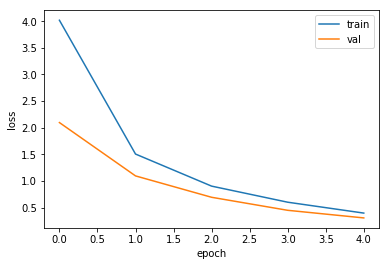

In [6]:
plt.plot([x[1] for x in losses], label='train');
plt.plot([x[2] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

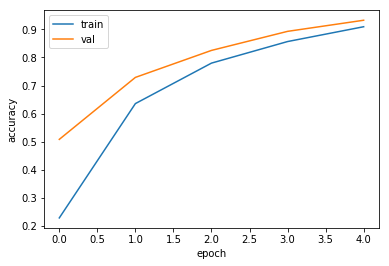

In [7]:
plt.plot([x[3] for x in losses], label='train');
plt.plot([x[4] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');